In [12]:
import pandas as pd
iris = pd.read_csv('iris.data', 
                  header=None,
                  names=['sepal_length', 'sepal_width', 
                         'petal_length', 'petal_width', 
                         'species'])
display(iris.head())
print(iris.info())



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [14]:
print("\nMISSING VALUES PER COLUMN:")
print(iris.isnull().sum())


MISSING VALUES PER COLUMN:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [15]:
if iris.isnull().sum().any():
    print("\nCleaning missing values...")
    iris = iris.dropna()  # or use .fillna() if preferred
else:
    print("\nNo missing values found!")



No missing values found!


In [16]:
# 1. Compute basic statistics
print("="*50)
print("1. BASIC STATISTICS OF NUMERICAL COLUMNS")
print("="*50)
print(iris.describe())

1. BASIC STATISTICS OF NUMERICAL COLUMNS
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [17]:
# 2. Group by species and compute means
print("\n" + "="*50)
print("2. MEAN MEASUREMENTS BY SPECIES")
print("="*50)
species_means = iris.groupby('species').mean()
display(species_means)


2. MEAN MEASUREMENTS BY SPECIES


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [18]:
# 3. Identify patterns and findings
print("\n" + "="*50)
print("3. KEY FINDINGS AND PATTERNS")
print("="*50)
print("a) Size Patterns:")
print("   - Virginica has the largest petals (mean length: {:.1f}cm)"
      .format(species_means.loc['Iris-virginica', 'petal_length']))
print("   - Setosa has the smallest petals (mean length: {:.1f}cm)"
      .format(species_means.loc['Iris-setosa', 'petal_length']))

print("\nb) Shape Patterns:")
print("   - Setosa has wider sepals relative to length (width/length ratio: {:.2f})"
      .format(species_means.loc['Iris-setosa', 'sepal_width']/species_means.loc['Iris-setosa', 'sepal_length']))
print("   - Virginica has narrower sepals relative to length (width/length ratio: {:.2f})"
      .format(species_means.loc['Iris-virginica', 'sepal_width']/species_means.loc['Iris-virginica', 'sepal_length']))

print("\nc) Distinctive Features:")
print("   - Setosa is clearly separable by petal size (all < 2cm)")
print("   - Versicolor and Virginica overlap more but Virginica is consistently larger")


3. KEY FINDINGS AND PATTERNS
a) Size Patterns:
   - Virginica has the largest petals (mean length: 5.6cm)
   - Setosa has the smallest petals (mean length: 1.5cm)

b) Shape Patterns:
   - Setosa has wider sepals relative to length (width/length ratio: 0.68)
   - Virginica has narrower sepals relative to length (width/length ratio: 0.45)

c) Distinctive Features:
   - Setosa is clearly separable by petal size (all < 2cm)
   - Versicolor and Virginica overlap more but Virginica is consistently larger


In [19]:
# Additional statistics
print("\n" + "="*50)
print("4. ADDITIONAL STATISTICS")
print("="*50)
print("Standard Deviation by Species:")
print(iris.groupby('species').std())

print("\nMedian Values by Species:")
print(iris.groupby('species').median())


4. ADDITIONAL STATISTICS
Standard Deviation by Species:
                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa          0.352490     0.381024      0.173511     0.107210
Iris-versicolor      0.516171     0.313798      0.469911     0.197753
Iris-virginica       0.635880     0.322497      0.551895     0.274650

Median Values by Species:
                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa               5.0          3.4          1.50          0.2
Iris-versicolor           5.9          2.8          4.35          1.3
Iris-virginica            6.5          3.0          5.55          2.0


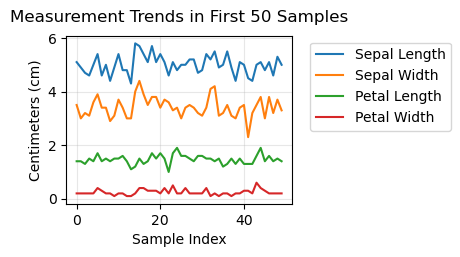

In [25]:
# Import matplotlib.pyplot at the beginning of your code
import matplotlib.pyplot as plt

## 1. Line Chart (Measurement Trends)
plt.subplot(2, 2, 1)
for measurement in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    plt.plot(iris.index[:50], iris[measurement][:50], label=measurement.replace('_', ' ').title())
plt.title('Measurement Trends in First 50 Samples', fontsize=12, pad=10)
plt.xlabel('Sample Index', fontsize=10)
plt.ylabel('Centimeters (cm)', fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

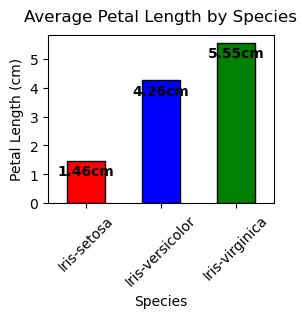

In [29]:
## 2. Bar Chart (Average Petal Length by Species)
plt.subplot(2, 2, 2)
avg_petal_length = iris.groupby('species')['petal_length'].mean()
colors = ['red', 'blue', 'green']
avg_petal_length.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Average Petal Length by Species', fontsize=12, pad=10)
plt.xlabel('Species', fontsize=10)
plt.ylabel('Petal Length (cm)', fontsize=10)
plt.xticks(rotation=45)
for index, value in enumerate(avg_petal_length):
    plt.text(index, value-0.5, f"{value:.2f}cm", ha='center', color='black', fontweight='bold')  # Added closing parenthesis here

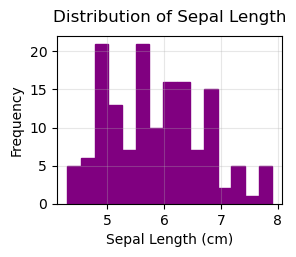

In [30]:
## 3. Histogram (Sepal Length Distribution)
plt.subplot(2, 2, 3)
plt.hist(iris['sepal_length'], bins=15, color='purple', edgecolor='purple')
plt.title('Distribution of Sepal Length', fontsize=12, pad=10)
plt.xlabel('Sepal Length (cm)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(True, alpha=0.3)

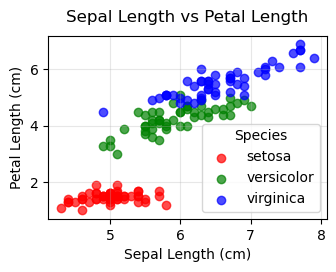

In [31]:
## 4. Scatter Plot (Sepal vs Petal Length)
plt.subplot(2, 2, 4)
colors = {'Iris-setosa':'red', 'Iris-versicolor':'green', 'Iris-virginica':'blue'}
for species, color in colors.items():
    subset = iris[iris['species'] == species]
    plt.scatter(subset['sepal_length'], subset['petal_length'], 
                color=color, label=species[5:], alpha=0.7)
plt.title('Sepal Length vs Petal Length', fontsize=12, pad=10)
plt.xlabel('Sepal Length (cm)', fontsize=10)
plt.ylabel('Petal Length (cm)', fontsize=10)
plt.legend(title='Species')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()